In [19]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
import sklearn.model_selection as ms
import numpy as np

In [4]:
df = pd.read_parquet('qb_data_complete.parquet')

In [18]:
df = df.dropna(subset=['fantasy_points_next_year'])

In [25]:
remove = ['espn_id', 'season', 'fantasy_points_per_game_next_year', 'fantasy_points_next_year', 'qualified_n-1', 'qualified_n-2', 'qualified']

In [32]:
y = df['fantasy_points_per_game_next_year']

In [33]:
X = df.drop(labels=remove, axis=1)

In [34]:
# define model
model = xgb.XGBRegressor()

In [44]:
# define model evaluation method
cv = ms.RepeatedKFold(n_splits=30, n_repeats=3, random_state=1)
# evaluate model
scores = ms.cross_val_score(model, X, y, scoring='neg_median_absolute_error', cv=cv, n_jobs=-1)

In [45]:
# force scores to be positive
scores = np.absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()))

Mean MAE: 2.608 (0.783)


#### Predicting Yearly:
- Mean MAE: 66.475 (8.018)
#### Predicting Weekly:
- Mean MAE: 3.425 (0.481)

(array([ 2.,  4., 10., 14., 15., 13., 14., 12.,  5.,  1.]),
 array([0.65959259, 1.04665612, 1.43371964, 1.82078317, 2.20784669,
        2.59491022, 2.98197375, 3.36903727, 3.7561008 , 4.14316433,
        4.53022785]),
 <BarContainer object of 10 artists>)

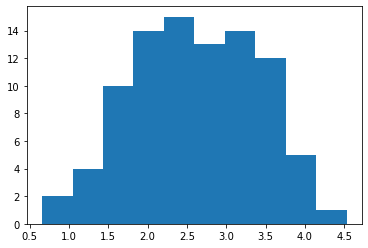

In [51]:
# histogram matplotlib
import matplotlib.pyplot as plt
plt.hist(scores, bins=10)